In [1]:
from utils import Portfolio
import pandas as pd 

In [2]:
nifty_df = pd.read_csv('nifty_500.csv')
nifty_df.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,3M India,Diversified,3MINDIA,EQ,INE470A01017
1,ABB India,Capital Goods,ABB,EQ,INE117A01022
2,ACC,Construction Materials,ACC,EQ,INE012A01025
3,AIA Engineering,Capital Goods,AIAENG,EQ,INE212H01026
4,APL Apollo Tubes,Capital Goods,APLAPOLLO,EQ,INE702C01027


In [3]:
stocks = nifty_df['Symbol'].tolist()

In [4]:
portfolio = Portfolio(stocks=stocks)

Getting data
[*********************100%***********************]  500 of 500 completed
[*********************100%***********************]  1 of 1 completed


# Efficient portfolio frontier:

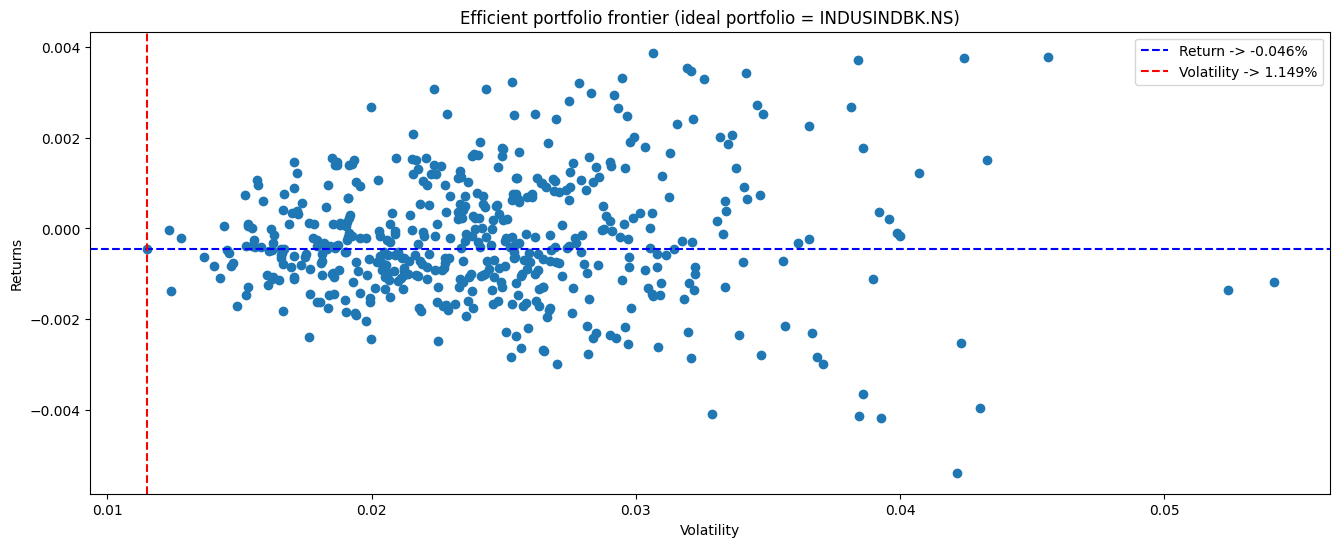

In [5]:
portfolio.see_frontier()

# Descriptive statistics about the portfolio

In [6]:
info = portfolio.describe()

In [7]:
info

{'Sharpe Ratio': -2.4611661055220857,
 'Treynors Ratio': -1.0108439930670513e-05,
 'Jensens Alpha': 358.68299246025407,
 'Information Ratio': -0.0001678369494356001}

# Clustering for portfolio optimization 

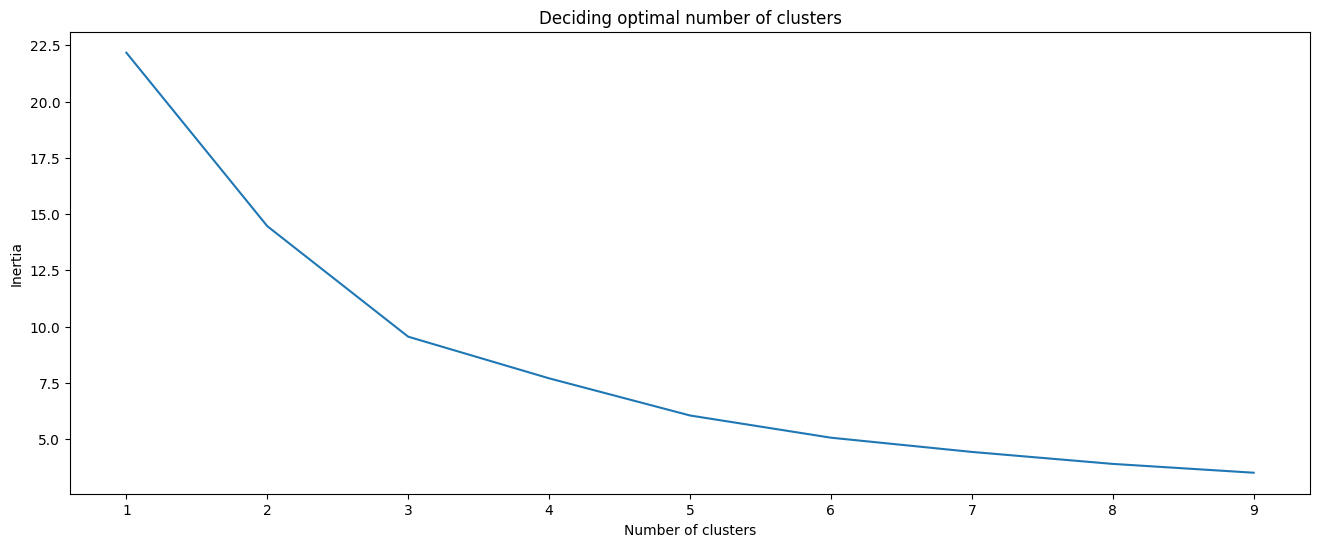

In [8]:
portfolio.find_clusters()

In [9]:
# From this graph, we can see that 5 clusters are optimal for portfolio diversification 
portfolio.cluster(k=5)

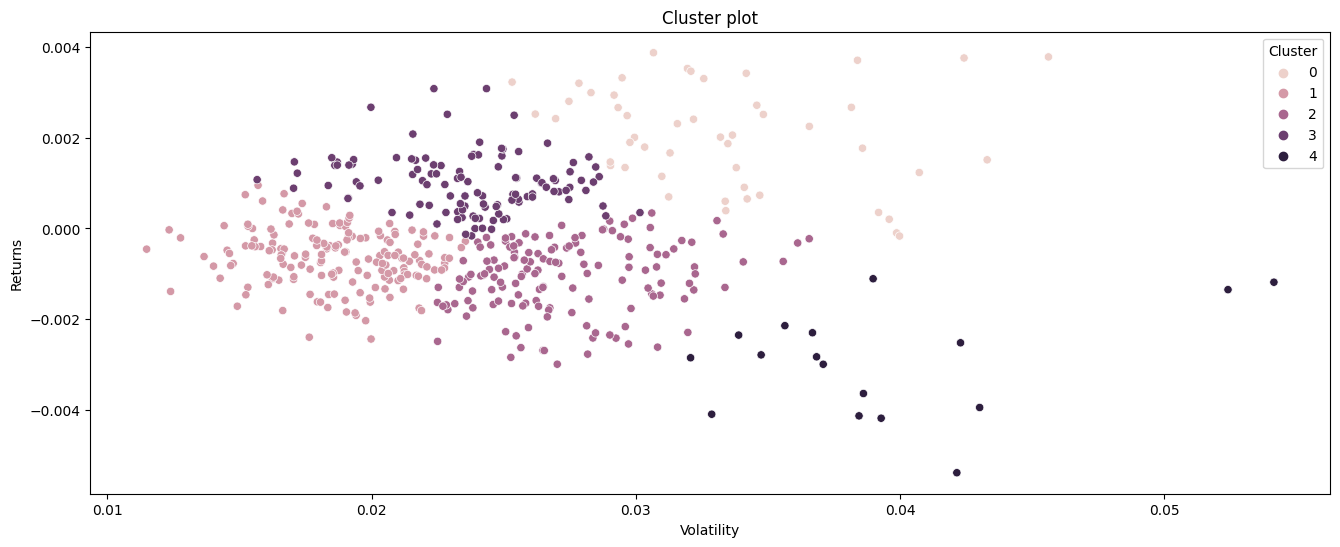

In [10]:
portfolio.visualize_clusters()